# *INTRODUCTION*

**Machine Learning Path:**</br>
BERLIAN MUHAMMAD GALIN AL AWIENOOR (M360DKX4331)</br>
FAKHRUL MAULIDAN GUSTIANA (M360DKX4329) 

# ***Link Dataset & Repository***:

https://github.com/berlianm/Rubist-Application

# *IMPORTING*

In [ ]:
import os

import zipfile

import numpy as np
import math
import pandas as pd


import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.image as mpimg

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

from PIL import Image

from keras.preprocessing.image import ImageDataGenerator #, img_to_array, load_img
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Flatten, Dense, Dropout, BatchNormalization
from sklearn.impute import SimpleImputer 

from scipy.stats import skew

import tensorflow as tf
import imgaug.augmenters as iaa
from tensorflow.keras.optimizers import Adam

from keras.utils.vis_utils import plot_model
from glob import glob

from sklearn.model_selection import train_test_split
from __future__ import print_function
import sys,tempfile, urllib, os

# *DATASET*

In [ ]:
# dataset from github
!wget --no-check-certificate \
    "https://github.com/berlianm/Rubist-Application/archive/refs/heads/main.zip" \
    -O "/tmp/dataset.zip"


zip_ref = zipfile.ZipFile('/tmp/dataset.zip', 'r') # open zip file
zip_ref.extractall('/tmp') # extract files into the /tmp folder
zip_ref.close()

--2023-06-08 00:56:53--  https://github.com/berlianm/Rubist-Application/archive/refs/heads/main.zip
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://codeload.github.com/berlianm/Rubist-Application/zip/refs/heads/main [following]
--2023-06-08 00:56:53--  https://codeload.github.com/berlianm/Rubist-Application/zip/refs/heads/main
Resolving codeload.github.com (codeload.github.com)... 140.82.114.10
Connecting to codeload.github.com (codeload.github.com)|140.82.114.10|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘/tmp/dataset.zip’

/tmp/dataset.zip        [               <=>  ]  78.78M  24.1MB/s    in 3.3s    

2023-06-08 00:56:56 (24.1 MB/s) - ‘/tmp/dataset.zip’ saved [82606929]



In [ ]:
# exploring dataset
cardboard_path = '/tmp/Rubist-Application-main/dataset/cardboard'
glass_path = '/tmp/Rubist-Application-main/dataset/glass'
metal_path = '/tmp/Rubist-Application-main/dataset/metal'
paper_path = '/tmp/Rubist-Application-main/dataset/paper'
plastic_path = '/tmp/Rubist-Application-main/dataset/plastic'
trash_path = '/tmp/Rubist-Application-main/dataset/trash'

num_cardboard = len(os.listdir(cardboard_path))
num_glass = len(os.listdir(glass_path))
num_metal = len(os.listdir(metal_path))
num_paper = len(os.listdir(paper_path))
num_plastic = len(os.listdir(plastic_path))
num_trash = len(os.listdir(trash_path))

print('Data Cardboard:', num_cardboard)
print('Data Glass    :', num_glass)
print('Data Metal    :', num_metal)
print('Data Paper    :', num_paper)
print('Data Plastic  :', num_plastic)
print('Data Trash    :', num_trash)

Data Cardboard: 403
Data Glass    : 501
Data Metal    : 410
Data Paper    : 594
Data Plastic  : 482
Data Trash    : 347


In [ ]:
total_data = num_cardboard + num_glass + num_metal + num_paper + num_plastic + num_trash

print('Total Data:', total_data)

Total Data: 2737


# *PREPROCESSING*

Berikut adalah beberapa preprocessing yang akan digunakan


1.   Labeling
2.   Split Data
3.   Checking Data
4.   Normalizing
5.   Evaluation




## *LABELING*

In [ ]:
# labeling each class
dataset_paths = {
    'cardboard': '/tmp/Rubist-Application-main/dataset/cardboard',
    'glass': '/tmp/Rubist-Application-main/dataset/glass',
    'metal': '/tmp/Rubist-Application-main/dataset/metal',
    'paper': '/tmp/Rubist-Application-main/dataset/paper',
    'plastic': '/tmp/Rubist-Application-main/dataset/plastic',
    'trash': '/tmp/Rubist-Application-main/dataset/trash'
}

class_names = ['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']
dataset = pd.DataFrame(columns=['image', 'target'])

for class_label, class_name in enumerate(class_names):
    class_path = dataset_paths[class_name]
    image_paths = [os.path.join(class_path, img_name) for img_name in os.listdir(class_path)]
    targets = [class_label] * len(image_paths)
    df = pd.DataFrame({'image': image_paths, 'target': targets})
    dataset = pd.concat([dataset, df], ignore_index=True)

# convert target labels to 0, 1, 2, 3, 4, 5
label_encoder = LabelEncoder()
dataset['target'] = label_encoder.fit_transform(dataset['target'])

class_counts = dataset['target'].value_counts()

for class_label, count in class_counts.items():
    class_name = label_encoder.inverse_transform([class_label])[0]
    print(f"Class: {class_name}, Count: {count} data")

Class: 3, Count: 594 data
Class: 1, Count: 501 data
Class: 4, Count: 482 data
Class: 2, Count: 410 data
Class: 0, Count: 403 data
Class: 5, Count: 347 data




---


*   **cardboard: 0**
*   **glass    : 1**
*   **metal    : 2**
*   **paper    : 3**
*   **plastic  : 4**
*   **trash    : 5**





In [ ]:
print(dataset.head())
print(dataset.tail()) 

                                               image  target
0  /tmp/Rubist-Application-main/dataset/cardboard...       0
1  /tmp/Rubist-Application-main/dataset/cardboard...       0
2  /tmp/Rubist-Application-main/dataset/cardboard...       0
3  /tmp/Rubist-Application-main/dataset/cardboard...       0
4  /tmp/Rubist-Application-main/dataset/cardboard...       0
                                                  image  target
2732  /tmp/Rubist-Application-main/dataset/trash/tra...       5
2733  /tmp/Rubist-Application-main/dataset/trash/org...       5
2734  /tmp/Rubist-Application-main/dataset/trash/org...       5
2735  /tmp/Rubist-Application-main/dataset/trash/tra...       5
2736  /tmp/Rubist-Application-main/dataset/trash/org...       5


## *SPLIT DATA*

In [ ]:
# divide the dataset into training sets
train_df, test_df = train_test_split(
    dataset, 
    test_size=0.2, 
    random_state=43, 
    stratify=dataset['target']
)

# divide the test set into validation sets
val_df, test_df = train_test_split(
    test_df, 
    test_size=0.25, 
    random_state=43, 
    stratify=test_df['target']
)

# print the shape of the set
print("Train: {}".format(train_df.shape))
for class_label, class_name in enumerate(class_names):
  count = train_df[train_df['target'] == class_label].shape[0]
  print(f"{class_name}: {count} data")
    
print("\nValidation: {}".format(val_df.shape))
for class_label, class_name in enumerate(class_names):
  count = val_df[val_df['target'] == class_label].shape[0]
  print(f"{class_name}: {count} data")
    
print("\nTest: {}".format(test_df.shape))
for class_label, class_name in enumerate(class_names):
  count = test_df[test_df['target'] == class_label].shape[0]
  print(f"{class_name}: {count} data")

Train: (2189, 2)
cardboard: 322 data
glass: 401 data
metal: 328 data
paper: 475 data
plastic: 385 data
trash: 278 data

Validation: (411, 2)
cardboard: 61 data
glass: 75 data
metal: 61 data
paper: 89 data
plastic: 73 data
trash: 52 data

Test: (137, 2)
cardboard: 20 data
glass: 25 data
metal: 21 data
paper: 30 data
plastic: 24 data
trash: 17 data


## *CHECKING DATA*

In [ ]:
# function to check image
def check_image_stats(dataset_path):
    image_count = {}
    image_size = {}

    for class_name, class_path in dataset_path.items():
        class_images = os.listdir(class_path)
        image_count[class_name] = len(class_images)
        image_size[class_name] = None

        for image_name in class_images:
            image_path = os.path.join(class_path, image_name)
            image = Image.open(image_path)
            width, height = image.size
            image_size[class_name] = (width, height)
            break  # only takes one size of one image
            
    for class_name in image_count.keys():
        print("Class:", class_name)
        print("Total Images:", image_count[class_name])
        print("Image Size:", image_size[class_name])
        print()

check_image_stats(dataset_paths)

Class: cardboard
Total Images: 403
Image Size: (512, 384)

Class: glass
Total Images: 501
Image Size: (512, 384)

Class: metal
Total Images: 410
Image Size: (512, 384)

Class: paper
Total Images: 594
Image Size: (512, 384)

Class: plastic
Total Images: 482
Image Size: (512, 384)

Class: trash
Total Images: 347
Image Size: (512, 384)



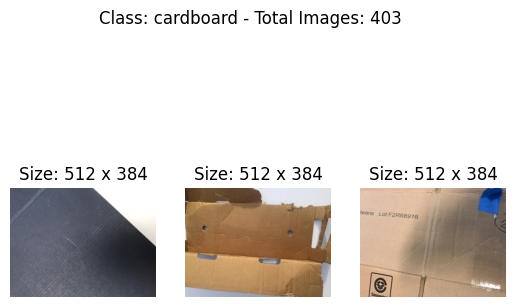

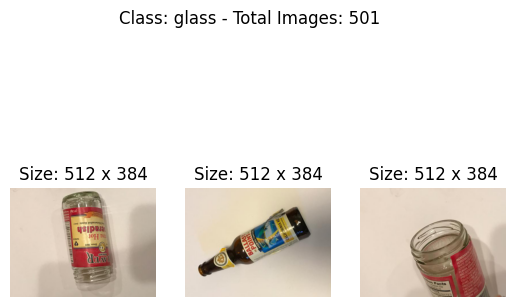

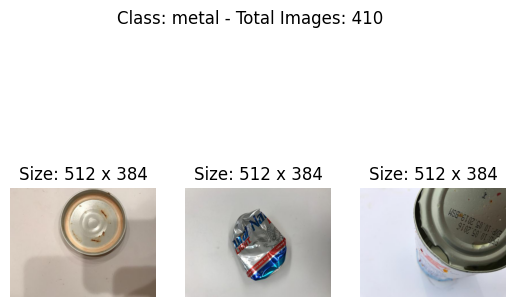

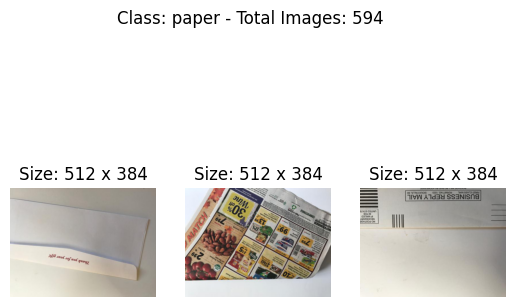

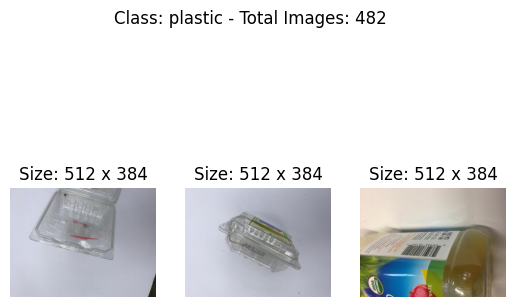

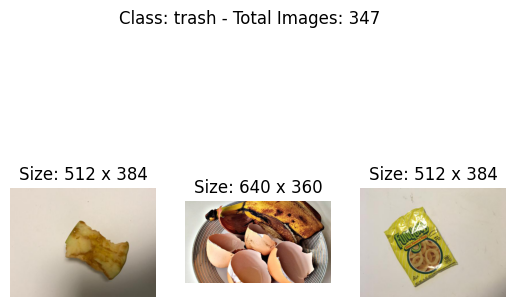

In [ ]:
# function to check image each class
def check_image(dataset_path, num_images=3):
    image_count = {}
    image_sizes = {}

    for class_name, class_path in dataset_path.items():
        class_images = os.listdir(class_path)
        image_count[class_name] = len(class_images)
        image_sizes[class_name] = []

        for i, image_name in enumerate(class_images):
            if i >= num_images:
                break

            image_path = os.path.join(class_path, image_name)
            image = Image.open(image_path)
            width, height = image.size
            image_sizes[class_name].append((width, height))

            plt.subplot(1, num_images, i+1)
            plt.imshow(image)
            plt.title(f"Size: {width} x {height}")
            plt.axis('off')

        plt.suptitle(f"Class: {class_name} - Total Images: {image_count[class_name]}")
        plt.show()
        print()

check_image(dataset_paths, num_images=3)

## *NORMALIZING*

The process of scaling data to a uniform range. The goal is to eliminate any scale differences that may exist between the features present in the dataset.

In [ ]:
# normalizing and resizing
def decode_image(filename, label=None, image_size=(256, 256)):
    bits = tf.io.read_file(filename)
    image = tf.image.decode_jpeg(bits, channels=3)
    image = tf.cast(image, tf.float32)  # convert to float32
    image /= 255.0  # normalize
    image = tf.image.resize(image, image_size)  # resize
    
    if label is None:
        return image
    else:
        # label encoding
        label_encoder = LabelEncoder()
        encoded_label = label_encoder.fit_transform(label)

        return image, tf.one_hot(encoded_label, depth=len(label_encoder.classes_))

## *DATA EVALUATION*

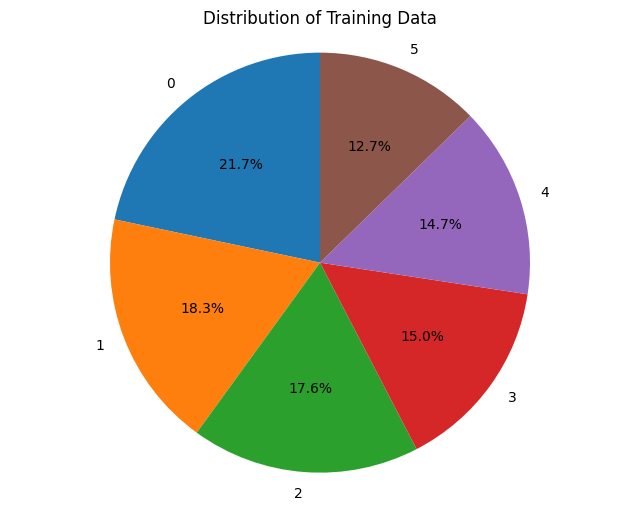

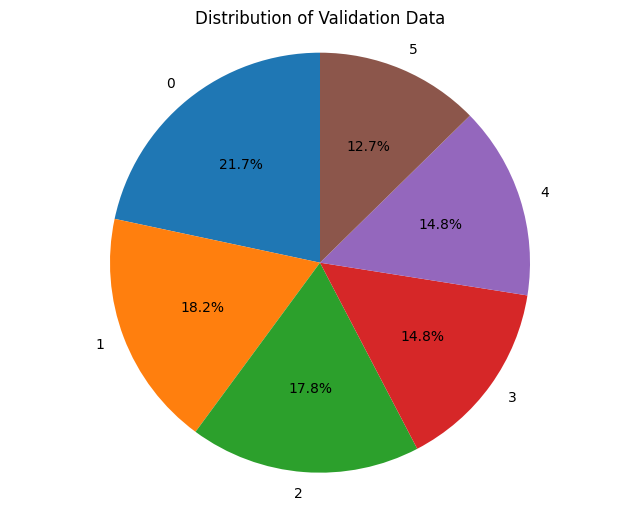

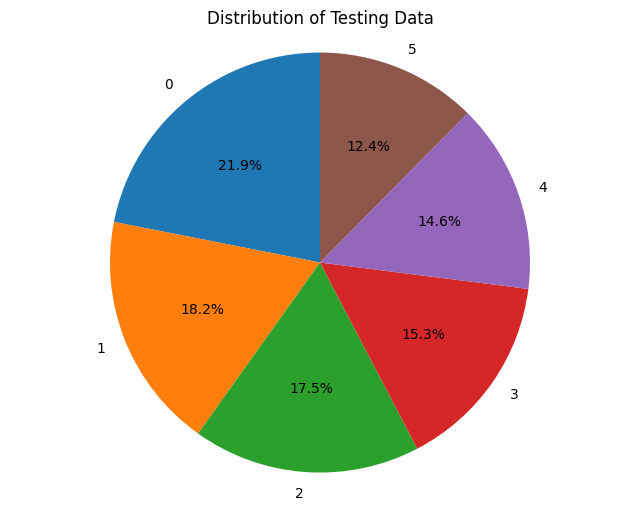

In [ ]:
train_counts = train_df['target'].value_counts()
val_counts = val_df['target'].value_counts()
test_counts = test_df['target'].value_counts()


class_names = label_encoder.classes_

# pie chart
plt.figure(figsize=(8, 6))
plt.pie(train_counts, labels=class_names, autopct='%1.1f%%', startangle=90)
plt.axis('equal') 
plt.title('Distribution of Training Data')
plt.show()

plt.figure(figsize=(8, 6))
plt.pie(val_counts, labels=class_names, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  
plt.title('Distribution of Validation Data')
plt.show()

plt.figure(figsize=(8, 6))
plt.pie(test_counts, labels=class_names, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  
plt.title('Distribution of Testing Data')
plt.show()


In [ ]:
print(dataset)

                                                  image  target
0     /tmp/Rubist-Application-main/dataset/cardboard...       0
1     /tmp/Rubist-Application-main/dataset/cardboard...       0
2     /tmp/Rubist-Application-main/dataset/cardboard...       0
3     /tmp/Rubist-Application-main/dataset/cardboard...       0
4     /tmp/Rubist-Application-main/dataset/cardboard...       0
...                                                 ...     ...
2732  /tmp/Rubist-Application-main/dataset/trash/tra...       5
2733  /tmp/Rubist-Application-main/dataset/trash/org...       5
2734  /tmp/Rubist-Application-main/dataset/trash/org...       5
2735  /tmp/Rubist-Application-main/dataset/trash/tra...       5
2736  /tmp/Rubist-Application-main/dataset/trash/org...       5

[2737 rows x 2 columns]


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2737 entries, 0 to 2736
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   image   2737 non-null   object
 1   target  2737 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 42.9+ KB


# *MODELING*


1.   *DATA AUGMENTATION* <BR>
Techniques in data processing that involve creating new variations of existing training data by applying transformations and manipulations to images or other data. The goal is to increase the variety and amount of available training data, which can help improve model performance and reduce overfitting. <BR>
2.   *TRANSFER LEARNING* <BR>
Techniques that involve using existing knowledge from a previously trained model to complete a new, similar task. We use a model that has been trained on a large dataset as a starting point, and then adapt it or use it as a feature extractor for smaller specific tasks or a limited dataset.
3.   *FINE TUNING* <BR>
Technique in transfer learning in which we take a previously trained model and retrain it on a specific task or a different dataset.



In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2189 entries, 1948 to 1381
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   image   2189 non-null   object
 1   target  2189 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 51.3+ KB


In [ ]:
train_df.head()

,image,target
1948,/tmp/Rubist-Application-main/dataset/plastic/p...,4
1661,/tmp/Rubist-Application-main/dataset/paper/pap...,3
2085,/tmp/Rubist-Application-main/dataset/plastic/p...,4
1290,/tmp/Rubist-Application-main/dataset/metal/met...,2
1777,/tmp/Rubist-Application-main/dataset/paper/pap...,3


## *TRANSFER LEARNING*

In [ ]:
module_selection = ("mobilenet_v2", 224, 1280) #@param ["(\"mobilenet_v2\", 224, 1280)", "(\"inception_v3\", 299, 2048)"] {type:"raw", allow-input: true}
handle_base, pixels, FV_SIZE = module_selection
MODULE_HANDLE ="https://tfhub.dev/google/tf2-preview/{}/feature_vector/4".format(handle_base)
IMAGE_SIZE = (pixels, pixels)
print("Using {} with input size {} and output dimension {}".format(MODULE_HANDLE, IMAGE_SIZE, FV_SIZE))

Using https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4 with input size (224, 224) and output dimension 1280


## *ENCODING*

In [ ]:
# function to encoding
def decode_image(filename, label=None, image_size=(pixels, pixels)):
    bits = tf.io.read_file(filename)
    image = tf.image.decode_jpeg(bits, channels=3)
    image = tf.image.resize(image, image_size)  # resize
    image = tf.cast(image, tf.float32)  # convert to float32
    image /= 255.0  # normalize
    
    if label is not None:
        label = tf.one_hot(label, depth=len(dataset_paths))
        return image, label
    else:
        
        return image, label

## *DATA AUGMENTATION*

In [ ]:
# function to augmenting
def augment_image(image, label=None):
    image = tf.image.random_flip_left_right(image)
    image = tf.image.random_flip_up_down(image)
    image = tf.image.random_brightness(image, 0.2)
    image = tf.image.random_contrast(image, lower=0.5, upper=1.5)
    image = tf.image.rot90(image, k=tf.random.uniform(shape=[], minval=0, maxval=4, dtype=tf.int32))

    if label is not None:
        return image, label
    else:
        return image, label

In [ ]:
AUTO = tf.data.experimental.AUTOTUNE
batch_size = 64

train_dataset = (
    tf.data.Dataset
    .from_tensor_slices((train_df['image'], train_df['target']))
    .map(decode_image, num_parallel_calls=AUTO)
    .map(augment_image, num_parallel_calls=AUTO)
    .repeat()
    .shuffle(512)
    .batch(batch_size)
    .prefetch(AUTO)
)

val_dataset = (
    tf.data.Dataset
    .from_tensor_slices((val_df['image'], val_df['target']))
    .map(decode_image, num_parallel_calls=AUTO)
    .batch(batch_size)
    .cache()
    .prefetch(AUTO)
)

test_dataset = (
    tf.data.Dataset
    .from_tensor_slices((test_df['image'], test_df['target']))
    .map(decode_image, num_parallel_calls=AUTO)
    .batch(batch_size)
    .cache()
    .prefetch(AUTO)
)

## *FINE TUNING*

In [ ]:
import tensorflow_hub as hub
do_fine_tuning = True

feature_extractor = hub.KerasLayer(MODULE_HANDLE,
                                   input_shape=IMAGE_SIZE + (3,), 
                                   output_shape=[FV_SIZE],
                                   trainable=do_fine_tuning)

## *BUILD MODEL*

In [ ]:
model = tf.keras.Sequential([
    feature_extractor,
    tf.keras.layers.Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(len(dataset_paths), activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 256)               327936    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 6)                 1542      
                                                                 
Total params: 2,587,462
Trainable params: 2,553,350
Non-trainable params: 34,112
_________________________________________________________________


In [ ]:
# train dataset
train_samples = train_dataset.take(1)
for images, labels in train_samples:
    print("Train Dataset")
    print("Images shape:", images.shape)
    print("Labels shape:", labels.shape)
    break

Train Dataset
Images shape: (64, 224, 224, 3)
Labels shape: (64, 6)


## *OPTIMIZATION*

In [ ]:
if do_fine_tuning:
    optimizer = tf.keras.optimizers.SGD(learning_rate=0.002, momentum=0.9)
    feature_extractor.trainable = True
else: 
    feature_extractor.trainable = False
    optimizer = "adam"

In [ ]:
# compile model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

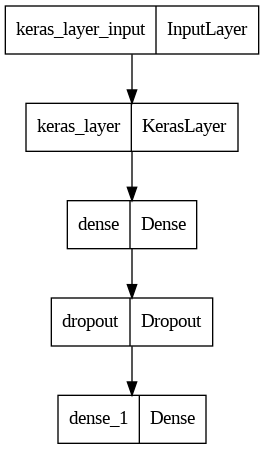

In [ ]:
plot_model(model)

## *CHECKPOINT*

In [ ]:
from keras.callbacks import ModelCheckpoint
mc = ModelCheckpoint('final_model_best_classification.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

In [ ]:
# fitting model
epochs = 75  # training epochs

history = model.fit(
    train_dataset,
    epochs=epochs,
    steps_per_epoch=len(train_df) // batch_size,
    validation_data=val_dataset,
    callbacks=[mc]
)

Epoch 1/75
34/34 [==============================] - ETA: 0s - loss: 1.4271 - accuracy: 0.6631 
Epoch 1: val_accuracy improved from -inf to 0.43309, saving model to final_model_best_classification.h5
34/34 [==============================] - 489s 14s/step - loss: 1.4271 - accuracy: 0.6631 - val_loss: 2.3994 - val_accuracy: 0.4331
Epoch 2/75
34/34 [==============================] - ETA: 0s - loss: 1.0172 - accuracy: 0.8189 
Epoch 2: val_accuracy improved from 0.43309 to 0.59854, saving model to final_model_best_classification.h5
34/34 [==============================] - 445s 13s/step - loss: 1.0172 - accuracy: 0.8189 - val_loss: 1.9142 - val_accuracy: 0.5985
Epoch 3/75
34/34 [==============================] - ETA: 0s - loss: 0.9471 - accuracy: 0.8249 
Epoch 3: val_accuracy did not improve from 0.59854
34/34 [==============================] - 445s 13s/step - loss: 0.9471 - accuracy: 0.8249 - val_loss: 3.3730 - val_accuracy: 0.5012
Epoch 4/75
34/34 [==============================] - ETA: 0s 

# *PERFORMANCE EVALUATION*

## *VALIDATION OF ACCURACY AND LOSS*

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


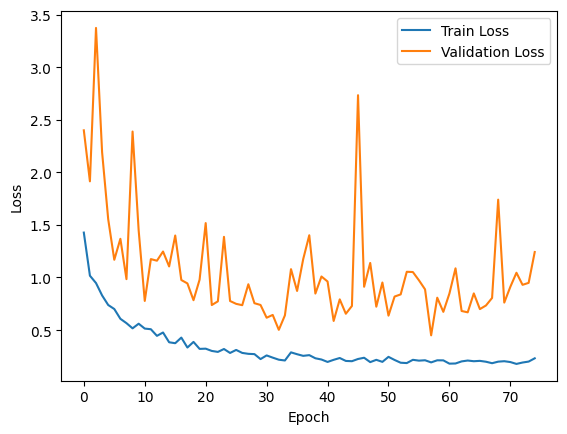

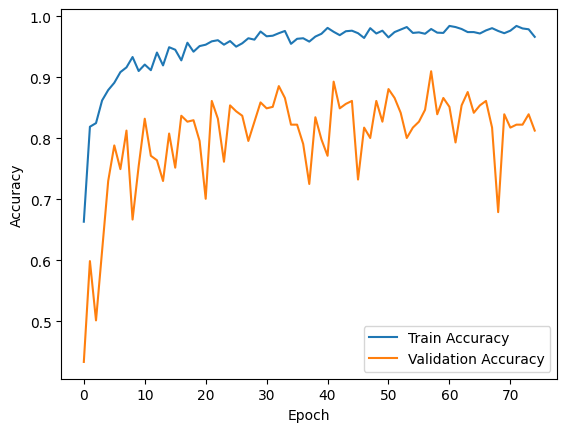

In [ ]:
print(history.history.keys())

# graph of accuracy and loss
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# *SAVING MODEL*

In [ ]:
# save model
model_filename = 'final_model_best_classification.h5'
model.save(model_filename)

# downloading
def download_file(file_path):
    from google.colab import files
    files.download(file_path)
download_file(model_filename)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>